In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import desimodel.io
import numpy as np

In [22]:
filename = "/global/cfs/cdirs/desi/users/schlafly/surveysim/exposures_nopass7.fits"
all_exposures = Table.read(filename, hdu=1)
all_tiledata = Table.read(filename, hdu=2)
all_tiles = desimodel.io.load_tiles()

all_exposures['MJD_OFFSET'] = all_exposures['MJD'] - all_exposures['MJD'].min()

select_subset_sky = True
program = 'bright'

if program=='dark':
    ii = (all_tiles['PROGRAM']=='DARK') | (all_tiles['PROGRAM']=='GRAY')
    all_tiles = all_tiles[ii]
elif program=='bright':
    ii = (all_tiles['PROGRAM']=='BRIGHT')
    all_tiles = all_tiles[ii]

if select_subset_sky:
    min_ra = 130
    max_ra = 190
    min_dec = -5
    max_dec = 15
    ii = (all_tiles['RA']>min_ra)
    ii &= (all_tiles['RA']<max_ra)
    ii &= (all_tiles['DEC']>min_dec)
    ii &= (all_tiles['DEC']<max_dec)
    tiles = all_tiles[ii]
    
ii = np.isin(all_exposures['TILEID'], tiles['TILEID'])    
exposures = all_exposures[ii]
a, b = np.unique(exposures['TILEID'], return_index=True)
unique_tiles = exposures['TILEID'][np.sort(b)]
unique_dates = exposures['MJD_OFFSET'][np.sort(b)]

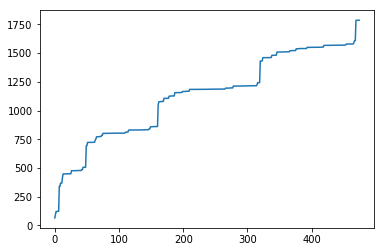

In [23]:
plt.plot(unique_dates)

In [24]:
ii = np.isin(tiles['TILEID'], unique_tiles)
print(np.count_nonzero(ii), len(unique_tiles))

475 475


<built-in function len>


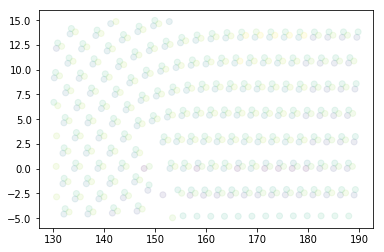

In [25]:
min_day_id = 0
max_day_id = 40000
ii = (unique_dates>=min_day_id) & (unique_dates<max_day_id)
tiles_in_batch = unique_tiles[ii]

jj = np.isin(tiles['TILEID'], tiles_in_batch)
plt.scatter(tiles['RA'][jj], tiles['DEC'][jj], c=unique_dates[ii], alpha=0.1)
print(len)

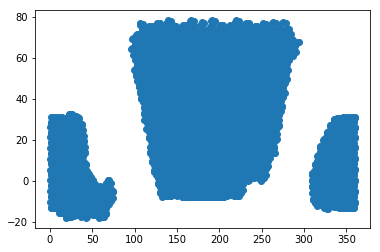

In [27]:
plt.scatter(all_tiles['RA'], all_tiles['DEC'])